In [1]:
import pandas as pd
import numpy as np

feature_name_df = pd.read_csv('adult.data', sep = ',',names = ["age","workclass","fnlwgt","education","education-num",
                                                               "marital-statue","occupation","relationship","race","sex",
                                                               "capital-gain","capital-loss","hours-per-week","native-country","income"])

feature_name_df.to_csv('adult.csv', mode = 'w',index = False)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import Series, DataFrame

adult_df = pd.read_csv('adult.csv')
adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-statue,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
print('\n ### train 데이터 정보 ###  \n')
print(adult_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-statue  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [4]:
print(' Sex 값 분포 :\n',adult_df['sex'].value_counts())
print('\n Cabin 값 분포 :\n',adult_df['age'].value_counts())
print('\n Embarked 값 분포 :\n',adult_df['income'].value_counts())

 Sex 값 분포 :
  Male      21790
 Female    10771
Name: sex, dtype: int64

 Cabin 값 분포 :
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

 Embarked 값 분포 :
  <=50K    24720
 >50K      7841
Name: income, dtype: int64


In [5]:
r1 = adult_df['occupation'].replace("?","etc", inplace=True)
r2 = adult_df['native-country'].replace("?","etc", inplace=True)

In [6]:
adult_df['native-country'] = adult_df['native-country'].str[1:2]
adult_df['native-country']

0        U
1        U
2        U
3        U
4        C
        ..
32556    U
32557    U
32558    U
32559    U
32560    U
Name: native-country, Length: 32561, dtype: object

In [7]:
adult_df.groupby(['sex','income'])['income'].count()

sex      income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
Name: income, dtype: int64

In [8]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['sex','income']
    for feature in features:
        le = preprocessing.LabelEncoder()   
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

adult_df = encode_features(adult_df)

<AxesSubplot:xlabel='race', ylabel='income'>

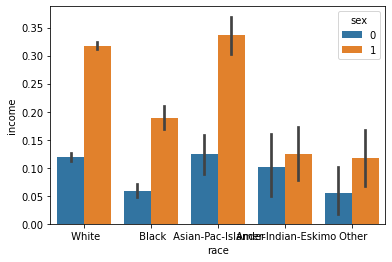

In [9]:
sns.barplot(x='race', y='income', hue='sex', data=adult_df)

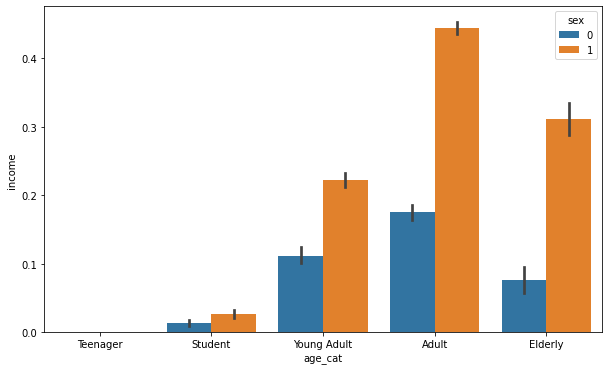

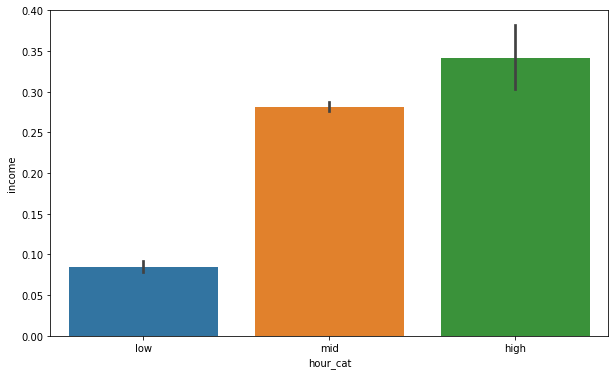

In [10]:
def get_category(age):
    cat = ''
    if age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
adult_df['age_cat'] = adult_df['age'].apply(lambda x : get_category(x))
sns.barplot(x='age_cat', y = 'income', hue='sex', data=adult_df, order=group_names)
adult_df.drop('age_cat', axis=1, inplace=True)

def hour_category(hours_per_week):
    cat = ''
    if hours_per_week<=35: cat = 'low'
    elif hours_per_week<= 70: cat = 'mid'
    else : cat= 'high'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['low','mid','high']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
adult_df['hour_cat'] = adult_df['hours-per-week'].apply(lambda x : hour_category(x))
sns.barplot(x='hour_cat', y = 'income', data=adult_df, order=group_names)
adult_df.drop('hour_cat', axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

def drop_features(df):
    df.drop(['workclass','fnlwgt','education','marital-statue'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    adult_df['native-country'] = adult_df['native-country'].str[1:2]
    features = ['sex','native-country','income','relationship','race']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = format_features(df)
    return df


In [12]:
X=adult_df.loc[:,'age':'native-country']
y=adult_df.loc[:,'income']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, \
                                                  test_size=0.2, random_state=11)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 배웠던 평가지표를 구현하는 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [16]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)

ValueError: could not convert string to float: ' Private'